## Simple Linear Regression (pytorch) الارتباط الخطي 

## 1 - Import liberaries استيراد المكتبات

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn

## 2 - Load the data تحميل البيانات

In [2]:
data= np.loadtxt('data.txt',delimiter=',')
X=data[:,0].reshape(-1, 1)
y=data[:,1].reshape(-1, 1)
del data

## 3 - Plotting the data تمثيل المعطيات على شكل بياني

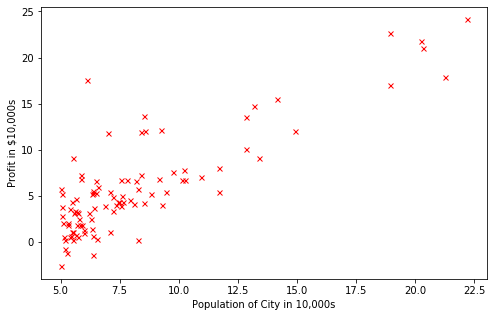

In [3]:
def plotData(X,y):
    plt.figure(figsize=(8,5))
    plt.plot(X,y,'rx',markersize=5)
    plt.ylabel('Profit in $10,000s')
    plt.xlabel('Population of City in 10,000s')
    plt.show()

plotData(X,y)

## 4 - Create linear model  إنشاء نموذج خطي

In [4]:
# Create class
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)  
    
    def forward(self, x):
        out = self.linear(x)
        return out

## 5 - Parameters الإعدادات اللازمة للتدريب

In [5]:
input_dim = 1
output_dim = 1
epochs = 3000
learning_rate = 0.01
criterion = nn.MSELoss()


In [6]:
model = LinearRegressionModel(input_dim, output_dim)

In [7]:
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [8]:
for epoch in range(epochs):

    # Convert numpy array to torch Variable
    inputs = torch.from_numpy(X).float().requires_grad_()
    labels = torch.from_numpy(y).float()

    # Clear gradients w.r.t. parameters
    optimizer.zero_grad() 
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    if (epoch % 100) == 1:
        print('epoch {}, loss {}'.format(epoch, loss.item()))

epoch 1, loss 10.585762977600098
epoch 101, loss 9.7337007522583
epoch 201, loss 9.33260440826416
epoch 301, loss 9.137825965881348
epoch 401, loss 9.043238639831543
epoch 501, loss 8.997305870056152
epoch 601, loss 8.975000381469727
epoch 701, loss 8.964168548583984
epoch 801, loss 8.958908081054688
epoch 901, loss 8.956354141235352
epoch 1001, loss 8.955113410949707
epoch 1101, loss 8.954510688781738
epoch 1201, loss 8.954218864440918
epoch 1301, loss 8.954075813293457
epoch 1401, loss 8.954007148742676
epoch 1501, loss 8.953973770141602
epoch 1601, loss 8.953957557678223
epoch 1701, loss 8.953949928283691
epoch 1801, loss 8.953946113586426
epoch 1901, loss 8.953944206237793
epoch 2001, loss 8.953943252563477
epoch 2101, loss 8.95394229888916
epoch 2201, loss 8.953943252563477
epoch 2301, loss 8.95394229888916
epoch 2401, loss 8.95394229888916
epoch 2501, loss 8.95394229888916
epoch 2601, loss 8.95394229888916
epoch 2701, loss 8.95394229888916
epoch 2801, loss 8.95394229888916
epoch 

In [9]:
value_1 = torch.Tensor([[15.0]])
value_2 = torch.Tensor([[7.5]])

print('For population = 150,000, we predict a profit of ','%0.2f'%(model(value_1).data.numpy()[0][0]*10000))
print('For population = 75,000, we predict a profit of ','%0.2f'%(model(value_2).data.numpy()[0][0]*10000))



For population = 150,000, we predict a profit of  139996.94
For population = 75,000, we predict a profit of  50519.88


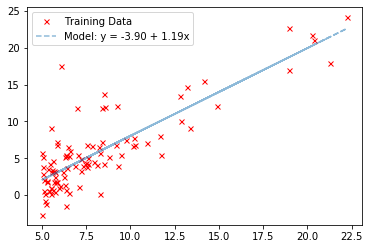

In [10]:

# Clear figure
plt.clf()

# Get predictions
predicted = model(torch.from_numpy(X).float().requires_grad_()).data.numpy()

# Plot true data
plt.plot(X,y,'rx',markersize=5, label='Training Data')

# Plot predictions
plt.plot(X, predicted, '--', label='Model: y = %0.2f + %0.2fx'%(model.linear.bias,model.linear.weight), alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()